<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/prervisao_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance scikit-learn pandas numpy joblib


In [2]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

symbbol = 'AAPL'

start_date = '2022-01-01'
end_date = '2023-12-31'

data = yf.download(symbbol, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
print(data.describe())

Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   501.000000  501.000000  501.000000  501.000000  5.010000e+02
mean    161.620327  163.288977  159.788979  161.460145  7.359234e+07
std      17.781001   17.512541   18.043879   17.813389  2.536511e+07
min     123.421257  126.136090  122.582127  124.398611  2.404830e+07
25%     147.230209  148.842056  145.348127  146.716186  5.414710e+07
50%     162.529846  163.731940  160.200681  162.136743  6.924600e+07
75%     174.569931  176.057069  172.656475  174.542947  8.670910e+07
max     196.669769  198.168786  195.567834  196.580427  1.826020e+08


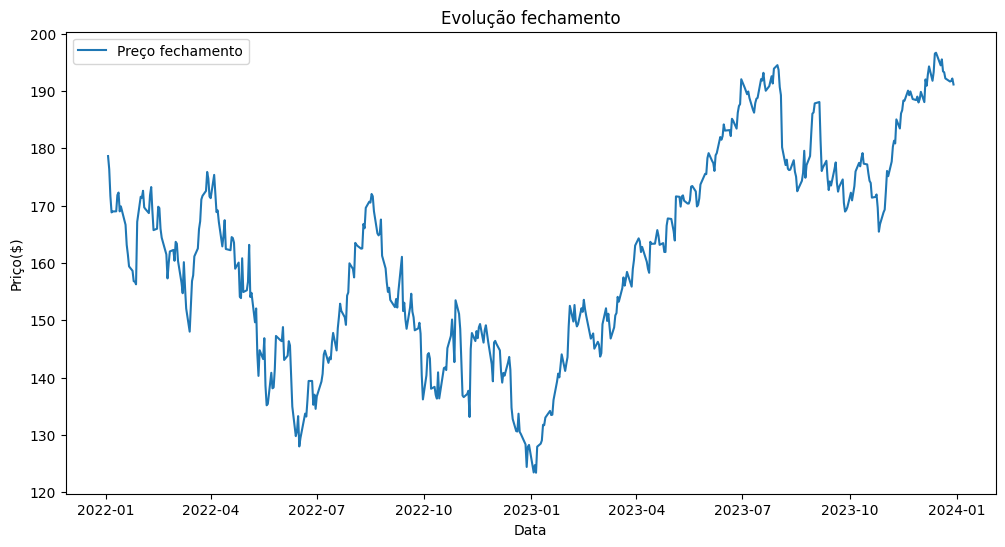

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço fechamento')
plt.title('Evolução fechamento')
plt.xlabel('Data')
plt.ylabel('Priço($)')
plt.legend()
plt.show()

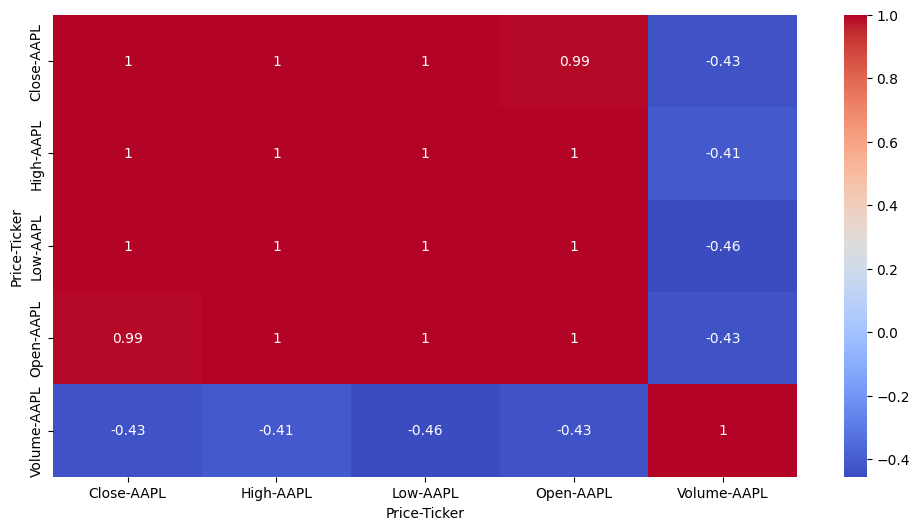

In [5]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')
plt.show()

In [6]:
data = data[['Open', 'High', 'Low', 'Volume','Close']]

data.dropna(inplace=True)

x = data[['Open', 'High', 'Low', 'Volume']]

y = data['Close']

In [8]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8304396606621114
R-squared: 0.9968449709903136
